In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,age,gender,sudden_weight_loss,genital_thrush,visual blurring,itching,irritability,delayed_healing,alopecia,obesity,result
0,40,Male,No,No,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,Yes,No,No,No,Yes,No,Positive
2,41,Male,No,No,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,Positive
4,60,Male,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
features = df.iloc[:, 0:10]
features.head()

,age,gender,sudden_weight_loss,genital_thrush,visual blurring,itching,irritability,delayed_healing,alopecia,obesity
0,40,Male,No,No,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,Yes,No,No,No,Yes,No
2,41,Male,No,No,No,Yes,No,Yes,Yes,No
3,45,Male,Yes,Yes,No,Yes,No,Yes,No,No
4,60,Male,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
label = df.iloc[:, -1]
label.head()

,result
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


In [ ]:
dm_feature = pd.get_dummies(data=features, drop_first=True, dtype=float)
dm_feature.head()

,age,gender_Male,sudden_weight_loss_Yes,genital_thrush_Yes,visual blurring_Yes,itching_Yes,irritability_Yes,delayed_healing_Yes,alopecia_Yes,obesity_Yes
0,40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,60,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dm_feature, label, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predicted_y = model.predict(x_test)
accuracy = accuracy_score(y_test, predicted_y)
accuracy

0.8942307692307693

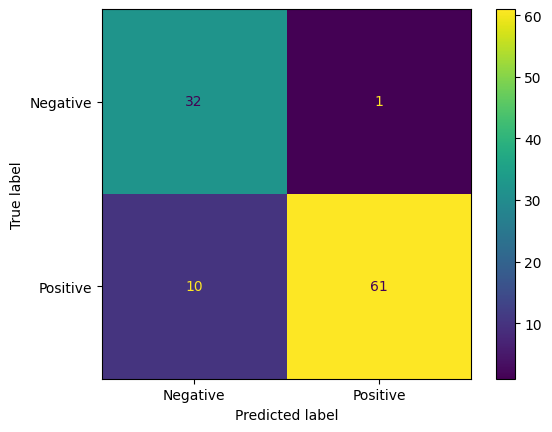

In [ ]:
cm = confusion_matrix(y_test, predicted_y, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.show()

In [ ]:
# classification report
rp = classification_report(y_test, predicted_y)
print(rp)

              precision    recall  f1-score   support

    Negative       0.76      0.97      0.85        33
    Positive       0.98      0.86      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.89       104
weighted avg       0.91      0.89      0.90       104



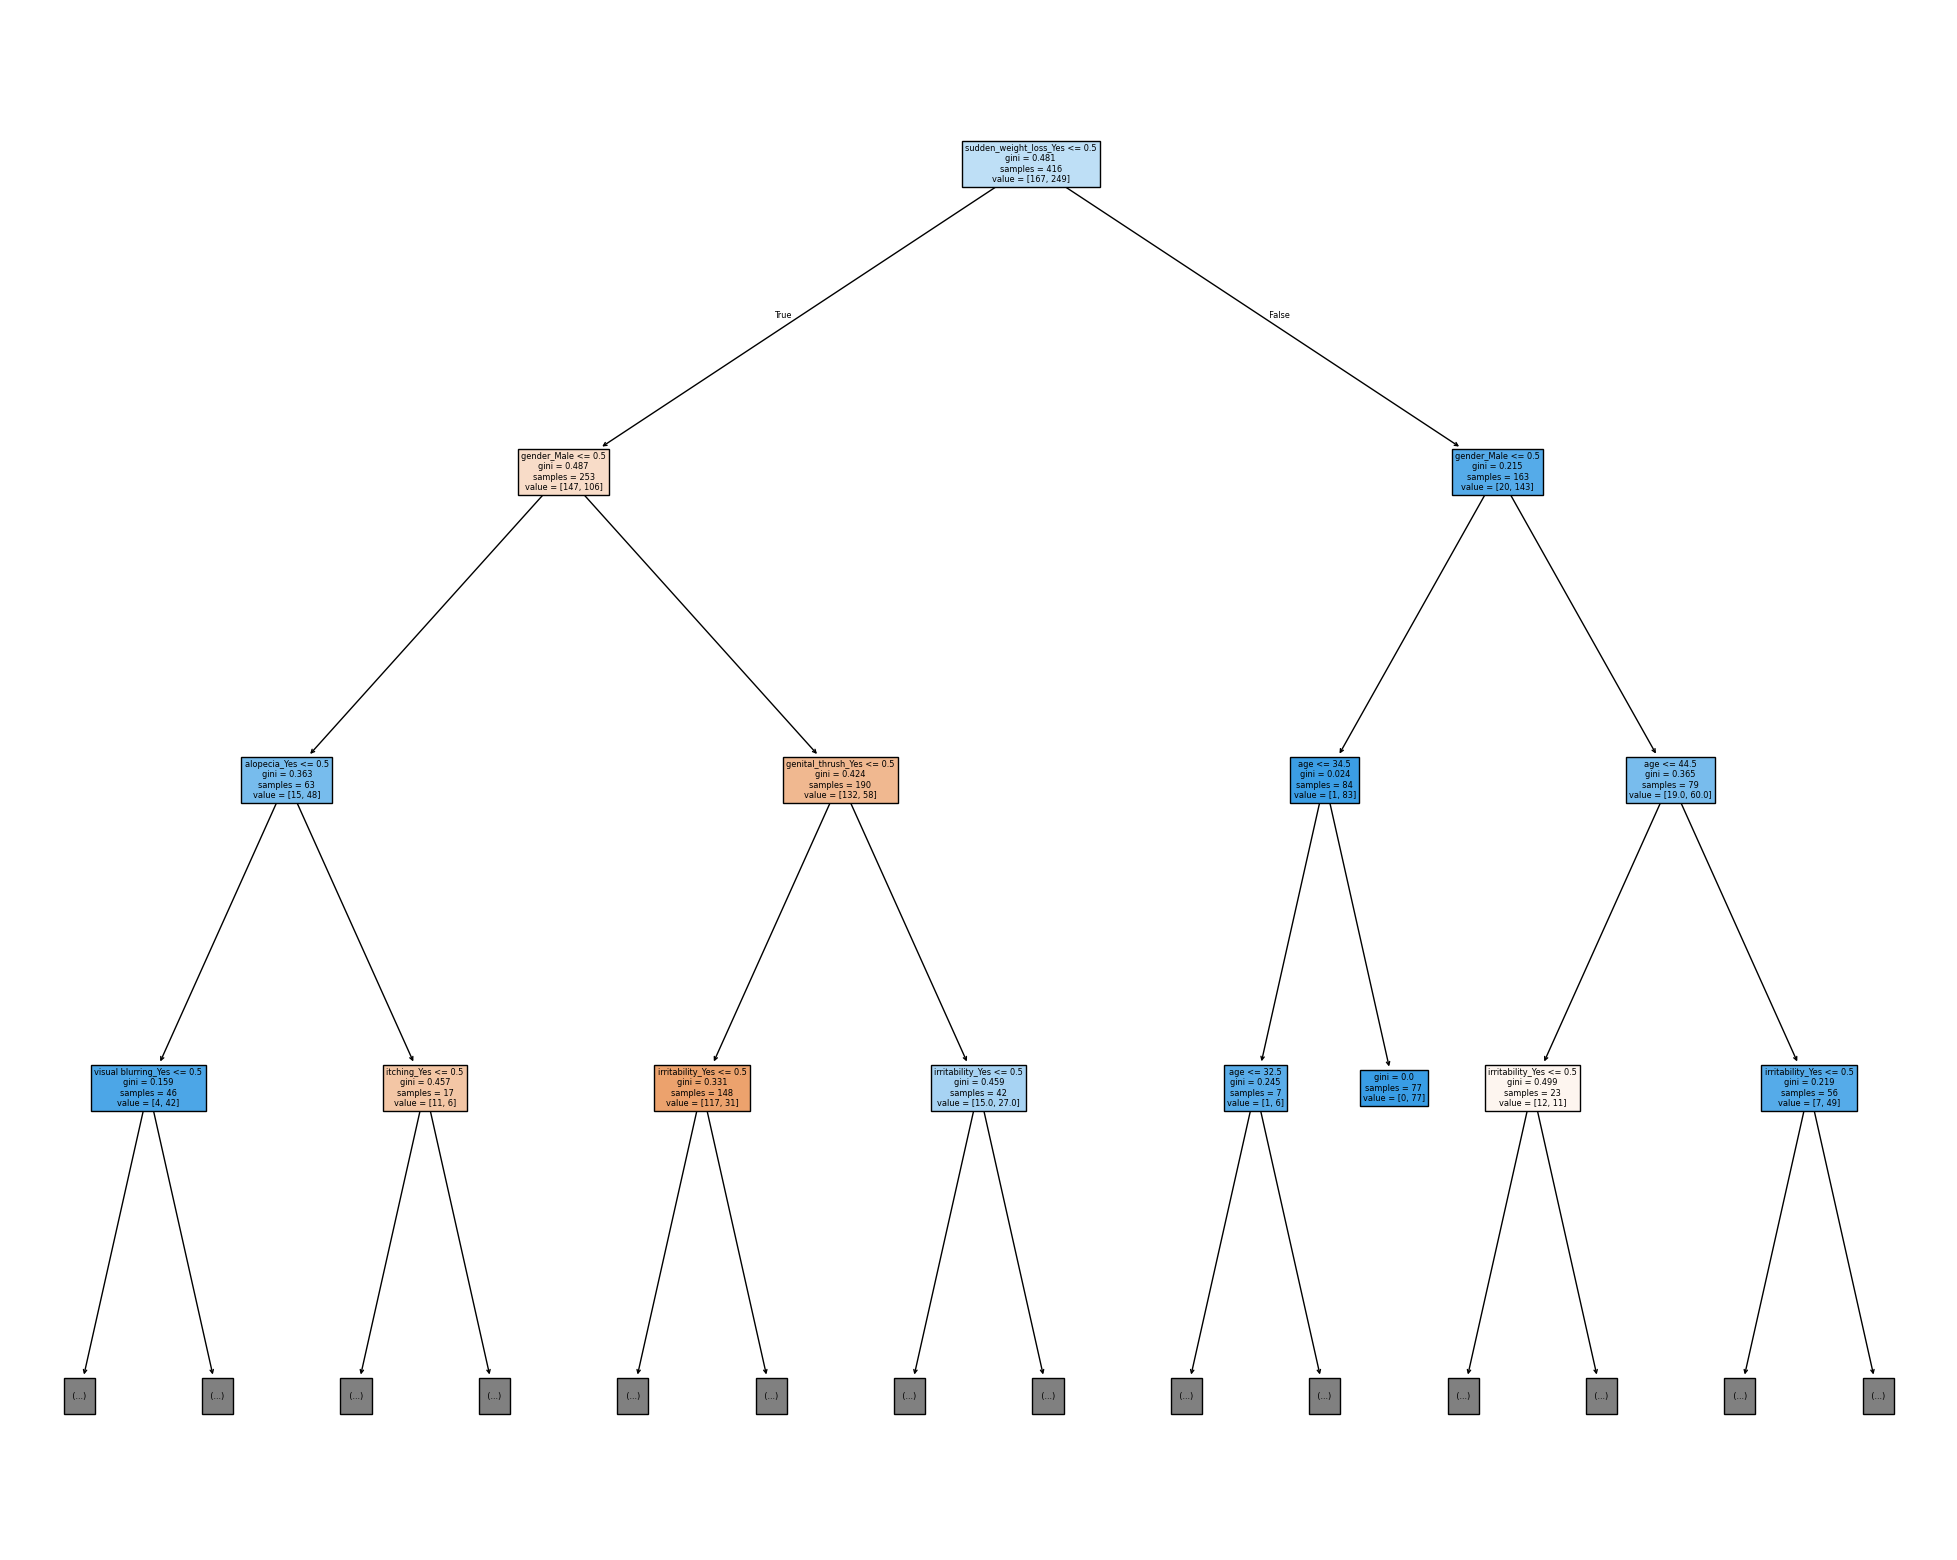

In [ ]:
# decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,
          feature_names = list(x_train),
          filled=True, max_depth=3)
plt.show()